In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




df = pd.read_csv("breast-cancer.csv")
print("Dataset Loaded. Shape:", df.shape)


df.drop("id", axis=1, inplace=True)


df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})


X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preparation complete.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Dataset Loaded. Shape: (569, 32)
Data preparation complete.
Training set size: (455, 30)
Testing set size: (114, 30)


In [14]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

print("\n--- BLOCK 2: TRAINING LINEAR SVM ---")

svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))



--- BLOCK 2: TRAINING LINEAR SVM ---
Linear SVM Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:

print("\n--- BLOCK 3: TRAINING RBF SVM ---")

svm_rbf = SVC(kernel="rbf", random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))



--- BLOCK 3: TRAINING RBF SVM ---
RBF SVM Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [16]:

from sklearn.model_selection import GridSearchCV

print("\n--- BLOCK 4: HYPERPARAMETER TUNING FOR RBF SVM ---")

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

y_pred_tuned = grid.predict(X_test)
print("Tuned RBF Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))



--- BLOCK 4: HYPERPARAMETER TUNING FOR RBF SVM ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9736263736263737
Tuned RBF Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




--- BLOCK 5: VISUALIZATION WITH PCA ---


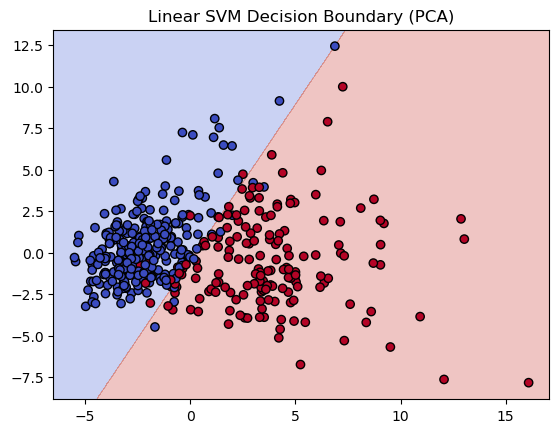

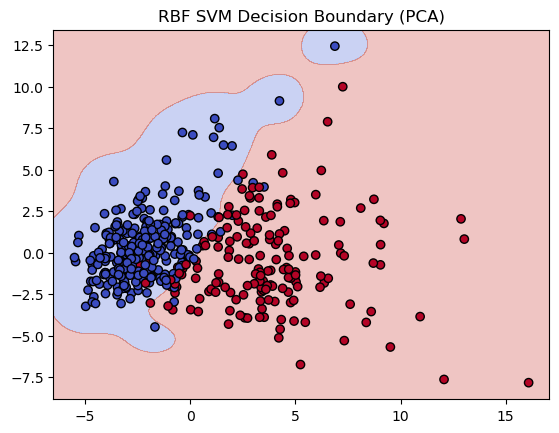

Decision boundaries plotted.


In [17]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

print("\n--- BLOCK 5: VISUALIZATION WITH PCA ---")


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


svm_linear_2d = SVC(kernel="linear")
svm_linear_2d.fit(X_train_pca, y_train)

svm_rbf_2d = SVC(kernel="rbf", gamma=0.5)
svm_rbf_2d.fit(X_train_pca, y_train)

def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear_2d, X_train_pca, y_train, "Linear SVM Decision Boundary (PCA)")
plot_decision_boundary(svm_rbf_2d, X_train_pca, y_train, "RBF SVM Decision Boundary (PCA)")

print("Decision boundaries plotted.")


In [18]:

from sklearn.model_selection import cross_val_score

print("\n--- BLOCK 6: CROSS-VALIDATION COMPARISON ---")

cv_linear = cross_val_score(SVC(kernel="linear"), X, y, cv=5)
cv_rbf = cross_val_score(SVC(kernel="rbf"), X, y, cv=5)

print("Linear SVM CV Scores:", cv_linear)
print("Linear SVM Mean Accuracy:", cv_linear.mean())

print("RBF SVM CV Scores:", cv_rbf)
print("RBF SVM Mean Accuracy:", cv_rbf.mean())



--- BLOCK 6: CROSS-VALIDATION COMPARISON ---
Linear SVM CV Scores: [0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]
Linear SVM Mean Accuracy: 0.9455364073901569
RBF SVM CV Scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
RBF SVM Mean Accuracy: 0.9121720229777983
